In [1]:
from sklearn.model_selection import train_test_split

import n_gram
import torch

from matplotlib import pyplot as plt

In [2]:
data = n_gram.load_data(test_size=0.2, train_size=0.8)

In [3]:
data["dev"], data["test"] = train_test_split(data["test"], test_size=0.5)

# Bigram model

In [4]:
num_grams = 2

## Counting

In [5]:
counts = n_gram.create_count_matrix(data["train"], data["stoi"], num_grams=num_grams, smoothing_factor=1)

print(f"""Dev loss: \t{n_gram.calculate_counts_loss(data["dev"], counts, data["stoi"]):.4f}""")
print(f"""Test loss: \t{n_gram.calculate_counts_loss(data["test"], counts, data["stoi"]):.4f}""")

Dev loss: 	2.4607
Test loss: 	2.4652


# NN

In [6]:
nn_data = dict()
nn_data["train"] = n_gram.prepare_for_nn(data["train"], data["stoi"], num_grams)
nn_data["dev"] = n_gram.prepare_for_nn(data["dev"], data["stoi"], num_grams)
nn_data["test"] = n_gram.prepare_for_nn(data["test"], data["stoi"], num_grams)

model = n_gram.init_nn_model(len(data["stoi"]), num_grams)

loss_history = n_gram.train_nn(nn_data["train"]["X"], nn_data["train"]["y"], model, verbose=False)

print(f"""Dev loss: \t{n_gram.calculate_nn_loss(nn_data["dev"]["X"], nn_data["dev"]["y"], model):.4f}""")
print(f"""Test loss: \t{n_gram.calculate_nn_loss(nn_data["test"]["X"], nn_data["test"]["y"], model):.4f}""")

Dev loss: 	2.5250
Test loss: 	2.5289


Text(0, 0.5, 'Loss')

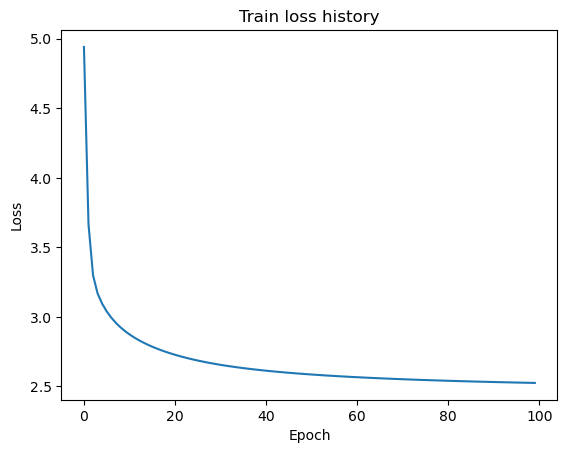

In [7]:
plt.plot(torch.arange(loss_history.size(0)), loss_history)
plt.title("Train loss history")
plt.xlabel("Epoch")
plt.ylabel("Loss")

# Trigram model

In [8]:
num_grams = 3

## Counting

In [9]:
counts = n_gram.create_count_matrix(data["train"], data["stoi"], num_grams=num_grams, smoothing_factor=1)

print(f"""Dev loss: \t{n_gram.calculate_counts_loss(data["dev"], counts, data["stoi"]):.4f}""")
print(f"""Test loss: \t{n_gram.calculate_counts_loss(data["test"], counts, data["stoi"]):.4f}""")

Dev loss: 	2.1155
Test loss: 	2.1378


## NN

In [10]:
nn_data = dict()
nn_data["train"] = n_gram.prepare_for_nn(data["train"], data["stoi"], num_grams)
nn_data["dev"] = n_gram.prepare_for_nn(data["dev"], data["stoi"], num_grams)
nn_data["test"] = n_gram.prepare_for_nn(data["test"], data["stoi"], num_grams)

model = n_gram.init_nn_model(len(data["stoi"]), num_grams)

loss_history = n_gram.train_nn(nn_data["train"]["X"], nn_data["train"]["y"], model, verbose=False)

print(f"""Dev loss: \t{n_gram.calculate_nn_loss(nn_data["dev"]["X"], nn_data["dev"]["y"], model):.4f}""")
print(f"""Test loss: \t{n_gram.calculate_nn_loss(nn_data["test"]["X"], nn_data["test"]["y"], model):.4f}""")

Dev loss: 	2.4680
Test loss: 	2.4804


Text(0, 0.5, 'Loss')

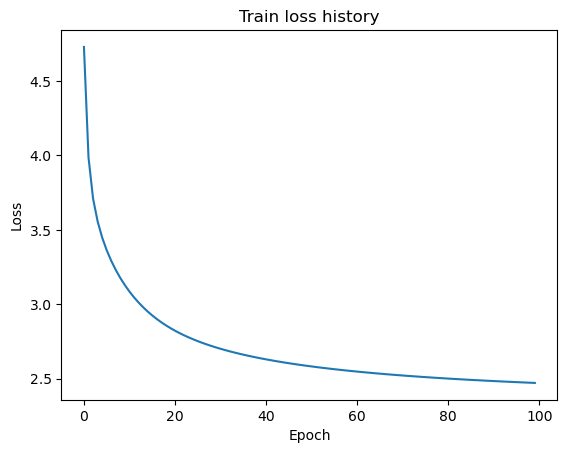

In [11]:
plt.plot(torch.arange(loss_history.size(0)), loss_history)
plt.title("Train loss history")
plt.xlabel("Epoch")
plt.ylabel("Loss")